# Numpy and Pandas for 2D Data

In [95]:
# # Uncomment to install modules used
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

You should consider upgrading via the 'c:\users\alimd\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# to make sure all plots get drawn on within the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [3]:
# Change False to True for each block of code to see what it does

# Accessing elements
if True:
    print (ridership[1, 3])  # guess - 2328 (correct!)
    print (ridership[1:3, 3:5])  # guess - explanation below
    print (ridership[1, :])  # guess - [1478, 3877, 3674, 2328, 2539] (correct!)


2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


## But why did the second command produce such a matrix?

Well, firstly, let's have a look at the matrix, and this time, let's mark the rows.
```py
[
    [   0,    0,    2,    5,    0],  # row 0
    [1478, 3877, 3674, 2328, 2539],  # row 1
    [1613, 4088, 3991, 6461, 2691],  # row 2
    [1560, 3392, 3826, 4787, 2613],  # row 3
    [1608, 4802, 3932, 4477, 2705],  # row 4
    [1576, 3933, 3909, 4979, 2685],  # row 5
    [  95,  229,  255,  496,  201],  # row 6
    [   2,    0,    1,   27,    0],  # row 7
    [1438, 3785, 3589, 4174, 2215],  # row 8
    [1342, 4043, 4009, 4665, 3033]  # row 9
]
```

In order to answer this, break the command by the parameters within the square brackets.
- Parameter 1 - `[1:3]`
- Parameter 2 - `[3:5]`

These are essentially two consecutive slices. First will be the row slicing from 1 to 3-1, and second will be the column slicing from 3 to 5-1.

### Parameter 1 - [1:3]
`a:b` means you start at `a`th row, and slice your way down to the `b-1`th row. So in this case, the sliced array of the original array would start at row 1, and go on till row 3 - 1 = 2, resulting in the following array:
```py
#    0       1      2    3     4    <= columns
[
    [1478, 3877, 3674, 2328, 2539],  # row 1
    [1613, 4088, 3991, 6461, 2691]  # row 2
]
```
Note that this time, the columns are also marked, because they will be needed in the second slicing of parameter 2.

### Parameter 2 - [3:5]
This time, instead of slicing rows, slice the columns (that's what the second parameter is for). So we begin at column 3, and slice uptil column 5-1 = 4, resulting in the following final matrix.
```py
[
    [2328, 2539],
    [6461, 2691]
]
```

In [4]:
# Vectorized operations on rows or columns
if True:
    print (ridership[0, :] + ridership[1, :])  # guess - [0, 0, 2, 5, 0] + [1478, 3877, 3674, 2328, 2539] = [1478, 3877, 3676, 2333, 2539]
    print (ridership[:, 0] + ridership[:, 1])  # guess - column 0 + column 1


[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [5]:
# Vectorized operations on entire arrays
if True:
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    print (a + b)  # guess - normal matrix addition

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [6]:
ridership

array([[   0,    0,    2,    5,    0],
       [1478, 3877, 3674, 2328, 2539],
       [1613, 4088, 3991, 6461, 2691],
       [1560, 3392, 3826, 4787, 2613],
       [1608, 4802, 3932, 4477, 2705],
       [1576, 3933, 3909, 4979, 2685],
       [  95,  229,  255,  496,  201],
       [   2,    0,    1,   27,    0],
       [1438, 3785, 3589, 4174, 2215],
       [1342, 4043, 4009, 4665, 3033]])

In [7]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    max_for_first = np.argmax(ridership[0, :])
    overall_mean = ridership.mean() # Replace this with your code - DONE
    mean_for_max = (ridership[:, max_for_first]).mean() # Replace this with your code - DONE
    
    return (overall_mean, mean_for_max)

In [8]:
mean_riders_for_max_station(ridership)

(2342.6, 3239.9)

## Numpy axes

Most numpy methods take an `axis` parameter.

In case of a two-dimensional array, the axis can take a value of 0 or 1. The operation will then happen across the column or the row respectively.

|`axis` | Operation|
|-------|----------|
|1 | across the row|
|0 | across the column|


In [9]:
# Change False to True for this block of code to see what it does

# NumPy axis argument
if True:
    a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    
    print (a.sum())  # guess: 45
    print (a.sum(axis=0))  # guess: [1+4+7, 2+5+8, 3+6+9] = [12, 15, 18]
    print (a.sum(axis=1))  # guess: [1+2+3, 4+5+6, 7+8+9] = [6, 15, 24]

45
[12 15 18]
[ 6 15 24]


In [10]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    mean_riders_per_day = ridership.mean(axis=0)
    max_daily_ridership = mean_riders_per_day.max()     # Replace this with your code - DONE
    min_daily_ridership = mean_riders_per_day.min()     # Replace this with your code - DONE
    
    return (max_daily_ridership, min_daily_ridership)

In [11]:
min_and_max_riders_per_day(ridership)

(3239.9, 1071.2)

# Pandas DataFrames

In [12]:
import pandas as pd

In [13]:
# DataFrame creation

# You can create a DataFrame out of a dictionary mapping column names to values
df_1 = pd.DataFrame({
    'A': [0, 1, 2],
    'B': [3, 4, 5]
})
print(df_1)


   A  B
0  0  3
1  1  4
2  2  5


In [14]:
# You can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]])
print(df_2)

   0  1  2
0  0  1  2
1  3  4  5


In [15]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[
        [   0,    0,    2,    5,    0],
        [1478, 3877, 3674, 2328, 2539],
        [1613, 4088, 3991, 6461, 2691],
        [1560, 3392, 3826, 4787, 2613],
        [1608, 4802, 3932, 4477, 2705],
        [1576, 3933, 3909, 4979, 2685],
        [  95,  229,  255,  496,  201],
        [   2,    0,    1,   27,    0],
        [1438, 3785, 3589, 4174, 2215],
        [1342, 4043, 4009, 4665, 3033]
    ],
    # indices will be the rows
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [16]:
# Accessing elements

# Rememeber - 
# index is the key to access an element,
# and position is the number where the element is located

print(ridership_df.iloc[0]) # gets the 0th row (position)

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64


In [17]:
print(ridership_df.loc['05-05-11']) # gets the row with the given row name (index)

R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64


In [18]:
ridership_df['R003'] # gets the column with the column name

05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64

In [19]:
ridership_df.iloc[1, 3] # gets the element at row 1 and column 3 (position)

2328

Therefore, remember this:
- Both `loc` and `iloc` are used to access elements in a Pandas DataFrame
- `loc` takes the _index_ parameter, which the key or the row name
- `iloc` takes the _position_ parameter, which is the the integer or slice in the array.

In [20]:
# Accessing multiple rows
ridership_df.iloc[1:4] # gets rows 1, 2, and 3

,R003,R004,R005,R006,R007
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613


In [21]:
# Accessing multiple columns
ridership_df[['R003', 'R005']]

,R003,R005
05-01-11,0,2
05-02-11,1478,3674
05-03-11,1613,3991
05-04-11,1560,3826
05-05-11,1608,3932
05-06-11,1576,3909
05-07-11,95,255
05-08-11,2,1
05-09-11,1438,3589
05-10-11,1342,4009


## Pandas Axes

In [22]:
df = pd.DataFrame(df_1)
df

,A,B
0,0,3
1,1,4
2,2,5


In [23]:
df.sum()  # prints the sum per column (axis = 0 by default)

A     3
B    12
dtype: int64

In [24]:
df.sum(axis=1)  # prints the sum per row

0    3
1    5
2    7
dtype: int64

In [25]:
df.values  # prints the dataframe as a 2D array, used for summing the all the numbers (as shown below)

array([[0, 3],
       [1, 4],
       [2, 5]], dtype=int64)

In [26]:
df.values.sum()

15

In [27]:
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [28]:
def mean_riders_for_max_station_pd(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    max_first_day = ridership.iloc[0].idxmax()

    overall_mean = ridership.values.mean() # Replace this with your code - DONE
    mean_for_max = ridership[max_first_day].mean() # Replace this with your code - DONE
    
    return (overall_mean, mean_for_max)

In [29]:
mean_riders_for_max_station_pd(ridership_df)

(2342.6, 3239.9)

## CSVs with Pandas DataFrames

Pandas DataFrames are particularly suitable for CSV files. DataFrames are 2D stuctures, just as CSV sheets, and they can have different column names for each column, also like CSVs.

In [30]:
subway_df = pd.read_csv('./nyc_subway_weather.csv')

In [31]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    n = len(x)
    xbar = x.mean()
    ybar = y.mean()
    # sop = sum([(xi-xbar)*(yi-ybar) for (xi, yi) in zip(x,y)])  # sum of products
    sop  = ((x-xbar)*(y-ybar)).sum()  # NOTE: I did not have to use the above commented way for SOP as Pandas does vector operations
    cov = sop / n  # covariance; formula for covariance described here: https://corporatefinanceinstitute.com/resources/knowledge/finance/covariance/
    x_std = x.std(ddof=0)
    y_std = y.std(ddof=0)
    return cov / (x_std*y_std)

In [32]:
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']
entries.std(ddof=0)

print (correlation(entries, rain))


0.03564851577224406


In [33]:
print (correlation(entries, temp))
print (correlation(rain, temp))

print (correlation(entries, cum_entries))

-0.026693348321570783
-0.22903432340843471
0.5858954707662075


## Pandas Axis Names

- `axis=0` is equivalent to `axis=index` for column operations
- `axis=1` is equivalent to `axis-columns` for row operations

Yep, it is confusing.

## DataFrames Vectorized Operations

In [34]:
import pandas as pd

# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print (df1 + df2)
    
# Adding DataFrames with overlapping column names 
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print (df1 + df2)

# Adding DataFrames with overlapping row indexes
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print (df1 + df2)

    """
    Guess (turned out to be correct!):
            a   b   c               a   b   c               a   b   c
    row1    1   4   7       row4    10  40  70      row1    NaN NaN NaN     # since [a, b, c] + NaN = NaN
    row2    2   5   8   +   row3    20  50  80  =   row2    32  65  98      # both columns of row2 got added
    row3    3   6   9       row2    30  60  90      row3    23  56  89      # both columns of row3 got added
                                                    row4    NaN NaN NaN     # since NaN + [a, b, c] = NaN
    """

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99
    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN
         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [35]:
# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    
    return entries_and_exits - entries_and_exits.shift(1, fill_value=0)

## Pandas apply methods

### First method - `applymap`

Passing your df in this method makes the helper method operate on every _element_ of the df.

In [36]:
# Change False to True for this block of code to see what it does

# DataFrame applymap()
if True:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print (df.applymap(add_one))


   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [37]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grade(grade):
    if grade in range(90, 101):
        return 'A'
    if grade in range(80, 90):
        return 'B'
    if grade in range(70, 80):
        return 'C'
    if grade in range(60, 70):
        return 'D'
    if grade in range(60):
        return 'F'
    
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(convert_grade)

convert_grades(grades_df)


,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


### Second method - `apply`
Passing your df in this method will make the helper method operate on every _column_ (or _row_) of the df.

In [38]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# DataFrame apply()
def convert_grades_curve(exam_grades):
    # Pandas has a bult-in function that will perform this calculation
    # This will give the bottom 0% to 10% of students the grade 'F',
    # 10% to 20% the grade 'D', and so on. You can read more about
    # the qcut() function here:
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    return pd.qcut(exam_grades,
                    [0, 0.1, 0.2, 0.5, 0.8, 1],
                    labels=['F', 'D', 'C', 'B', 'A'])
    
# qcut() operates on a list, array, or Series. This is the
# result of running the function on a single column of the
# DataFrame.
print (convert_grades_curve(grades_df['exam1']))

# qcut() does not work on DataFrames, but we can use apply()
# to call the function on each column separately
print (grades_df.apply(convert_grades_curve))

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [39]:
def standardize_exam(exam):
    std = exam.std(ddof=0)
    exam_bar = exam.mean()
    return (exam - exam_bar) / std

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(standardize_exam)

In [40]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


### Note
In order to get the proper computations, we should actually be setting the value of the "ddof" parameter to 0 in the .std() function.

Note that the type of standard deviation calculated by default is different between numpy's .std() and pandas' .std() functions.

By default,
 - **numpy** calculates a **population** standard deviation, with "ddof = 0".
 - **pandas** calculates a **sample** standard deviation, with "ddof = 1".
 
 If we know all of the scores, then we have a population - so to standardize using pandas, we need to set "ddof = 0".

 (This excerpt is based on from the Udacity course page linked [here](https://classroom.udacity.com/courses/ud170/lessons/5428018709/concepts/54422617900923).)

In [41]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if True:   
    print (df.apply(np.mean))
    print (df.apply(np.max))


a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [42]:
def second_largest_in_column(column):
    return np.sort(column)[-2]

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(second_largest_in_column)

In [43]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

### Vector Operations: Adding Series to DataFrames

In [44]:
# Change False to True for each block of code to see what it does

# Adding a Series to a square DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)  # s gets added to each row of df

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [45]:
   
# Adding a Series to a one-row DataFrame 
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)  # guess: [11, 22, 33, 44] (correct!)


    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [46]:
# Adding a Series to a one-column DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)  # the series will get added to each row of the df, with fill value as NaN in the df
                    # so the o/p should be: [[11,NaN,NaN,NaN], [21,NaN,NaN,NaN], [31,NaN,NaN,NaN], [41,NaN,NaN,NaN]]

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [47]:
# Adding when DataFrame column names match Series index
if True:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s) # guess: s[a] will get added to pd[a], s[b] will get added to pd[b], and so on


    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [48]:
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)  # all NaN's, with extended columns

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### Vector operations: `+` vs `add` in Pandas

- `df.add(s)` is the same as `df+s`, where `s` gets added to each column of `df`.
- `df.add(s, axis='columns')` is the same as `df+s`, where `s` gets added to each column of `df`.
- `df.add(s, axis='index')` is where `s` gets added to each _row_ of `df`

The functions `sub()`, `mul()`, and `div()` work similarly to `add()`

In [49]:
df = pd.DataFrame({0: [1,2,3,4]})
df

,0
0,1
1,2
2,3
3,4


In [50]:
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [51]:
df+s

,0,1,2,3
0,2,NaN,NaN,NaN
1,3,NaN,NaN,NaN
2,4,NaN,NaN,NaN
3,5,NaN,NaN,NaN


In [52]:
df.add(s, axis="index")

,0
0,2
1,4
2,6
3,8


In [53]:
s

0    1
1    2
2    3
3    4
dtype: int64

### Vector operations: Standardizing DataFrames

In [54]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    # for examName in df:
    #     exam = df[examName]
    #     df[examName] = (exam - exam.mean()) / exam.std(ddof=0)
    # return df
    return (df - df.mean()) / df.std(ddof=0)

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    # for index in df.index:
    #     df.loc[index] = (df.loc[index] - df.loc[index].mean()) / df.loc[index].std(ddof=0)
    # return df
    difference = (df.sub(df.mean(axis='columns'), axis='index'))
    return difference.div(df.std(ddof=0, axis='columns'), axis='index')

In [55]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [56]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


## Pandas `groupby` for Grouping Items

In [60]:
# First, have a look at the example df
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
example_df


,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [64]:

# Change False to True for each block of code to see what it does
    
# Examine groups
if True:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print (grouped_data.groups)  #`groups` attriubte returns a dictionary with group values as keys, and their corresponding rows as values


{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


In [65]:

# Group by multiple columns
if True:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print (grouped_data.groups)  # for an array of `groupby`s, the `groups` contains a zip of group values as keys


{(False, False): ['a', 'b', 'e'], (True, False): ['c'], (True, True): ['d', 'f', 'g']}


In [68]:
example_df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [69]:
# Get sum of each group
if True:
    grouped_data = example_df.groupby('even')
    print (grouped_data.sum())


       value  above_three
even                     
False      5            0
True      16            3


In [76]:
# Limit columns in result
if True:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print (grouped_data.sum()['value'])
    
    print ('\n') # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print (grouped_data['value'].sum())


even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


In [78]:
subway_df = pd.read_csv('./nyc_subway_weather.csv')

In [79]:
### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [91]:
grouped_subway_data = subway_df.groupby('day_week')['ENTRIESn_hourly']
ridership = grouped_subway_data.mean()

In [92]:
ridership

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

<AxesSubplot:xlabel='day_week'>

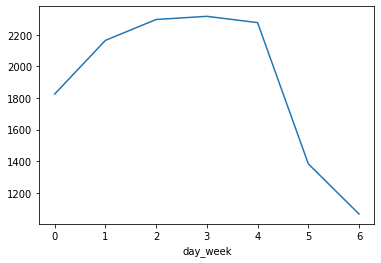

In [100]:
ridership.plot()

### Groupby exercise

In [103]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Standardize each group
if True:
    def standardize(xs):
        return (xs - xs.mean()) / xs.std()
    grouped_data = example_df.groupby('even')
    print (grouped_data['value'].apply(standardize))


a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [106]:
# Find second largest value in each group
if True:
    def second_largest(xs):
        sorted_xs = xs.sort_values(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')
    print (grouped_data['value'].apply(second_largest))


even
False    1
True     4
Name: value, dtype: int32


In [170]:
def get_hourly_entries_and_exits_per_entry(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift(1, fill_value=0)

In [171]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    # applicable = entries_and_exits[['ENTRIESn', 'EXITSn']]
    # entries_and_exits[['ENTRIESn', 'EXITSn']] = applicable.apply(get_hourly_entries_and_exits_per_entry)
    return entries_and_exits.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(get_hourly_entries_and_exits_per_entry)

In [172]:
grouped = get_hourly_entries_and_exits(ridership_df)

In [173]:
grouped

,ENTRIESn,EXITSn
0,3144312,1088151
1,8936644,13755385
2,23,8
3,14,8
4,18,18
5,29,205
6,71,54
7,132,593
8,170,44
